# Introduction

In this project, we used Reinforcement Learning to train an agent to complete a simplified version of our assigment in Project 1 of this class: the game Exactly One Mazes.

This agent will be trained in order for it to learn how to win the game.

The objective of the game is to have the player cross from the bottom-left to the top right square, without crossing the same L shape more than one time. The player also must not navigate sections of the board he has already visited.

The Player can move in any direction, as long as the square he is in does not belong to an already visited L shape.

# Required Libraries and Tools

● OpenAI Gym - A framework that acts as a playground for testing agents, using
controlled environments;

● Numpy - A library for processing data in arrays;

● Matplotlib - Data visualization libraries to draw plots and charts;

● Jupyter Notebooks - Interactive computing and development.

# Algorithms used

To teach the agent, the following algorithms were implemented:

● Q-Learning - State–action–reward–state;

● SARSA - State–action–reward–state–action.

# Models

In this notebook, we are using two models.

Both are 4x4 boards, the simpler one having two L shapes, with the second, more complex one having three.

The rewards were distributed in such a way that the algorithm was severely punished for every bad move:

● If visiting an already visited cell, -50 points

● If visiting an L shape for the second time, -50 points

● If it reached the end without visiting all L shapes, -50 points

● If landing in a neutral (0) cell, -0.50 points (-0.75 in the case of the more complex model)

    ● This was made so the algorithm would reach the end as fast as possible

● If visiting a newly discovered L shape, +10 points

● If it reached the end and visited all L shapes, +10 points


# Importing what's necessary

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from env import TakeTheLEnv

# Defining the hyperparameters and creating the Q table

In [46]:
total_episodes = 500  # the total number of episodes to run
max_steps = 100  # the maximum number of steps per episode

learning_rate = 0.5
gamma = 0.6  # the discount factor

# the range for the exploration parameter epsilon
epsilon = 0.1
min_epsilon = 0.01
max_epsilon = 1.0
decay_rate = 0.01

qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Defining the learning process and the updating functions

In [47]:
def choose_action(state):
    exp_exp_tradeoff = random.uniform(0, 1)

    if exp_exp_tradeoff < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(qtable[state, :])
    return action


def update_qlearning(state, new_state, reward, action):
    qtable[state, action] = qtable[state, action] + learning_rate * (
        reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action]
    )


def update_sarsa(state, new_state, reward, action, new_action):
    qtable[state, action] = qtable[state, action] + learning_rate * (
        reward + gamma * qtable[new_state, new_action] - qtable[state, action]
    )

# To keep track of the rewards and the epsilon state over the episodes
rewards = []
epsilons = []


def learn(use_sarsa):
    global qtable
    success = 0
    for episode in range(total_episodes):
        state = env.reset()
        done = False
        total_rewards = 0
        for _ in range(max_steps):
            # Converting the state to a position on the table
            action = choose_action(state)
            new_state, reward, done, info = env.step(action)

            if use_sarsa:
                new_action = choose_action(new_state)
                update_sarsa(state, new_state, reward, action, new_action)
            else:
                update_qlearning(state, new_state, reward, action)

            total_rewards += reward

            state = new_state
            env.set_state(env.from_idx(new_state))

            if done:
                if total_rewards < 0:
                    print("Failed episode:", episode)
                else:
                    env.render()
                    success += 1
                print("Total reward for episode {}: {}".format(episode, total_rewards))
                break

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(
            -decay_rate * episode
        )
        rewards.append(total_rewards)
        epsilons.append(epsilon)

    print("Score/time: " + str(sum(rewards) / total_episodes))
    print("success of", success/total_episodes)
    print(qtable)

    x = range(total_episodes)
    plt.plot(x, rewards)
    plt.xlabel("Episode")
    plt.ylabel("Training total reward")
    plt.title("Total rewards over all episodes in training")
    plt.show()

    plt.plot(epsilons)
    plt.xlabel("Episode")
    plt.ylabel("Epsilon")
    plt.title("Epsilon for episode")
    plt.show()

    qtable = np.zeros((env.observation_space.n, env.action_space.n))
    rewards.clear()
    epsilons.clear()


## Execution

#### Simple Model

In [48]:
env = TakeTheLEnv()
env.set_board( [[1, 2, 2, 0],
                [1, 0, 2, 0],
                [1, 1, 2, 0],
                [0, 0, 0, 0]])
env.render()


    0   1   2   3
  _________________
0 | 1 | 2 | 2 | 0 |
1 | 1 | 0 | 2 | 0 |
2 | 1 | 1 | 2 | 0 |
3 | 0 | 0 | 0 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾



## Algorithms execution for the simple board

#### Q-Learning

Failed episode: 0
Total reward for episode 0: -2123.0
Failed episode: 1
Total reward for episode 1: -2472.5
Failed episode: 2
Total reward for episode 2: -822.5
Failed episode: 3
Total reward for episode 3: -692.5
Failed episode: 4
Total reward for episode 4: -252.5
Failed episode: 5
Total reward for episode 5: -971.0
Failed episode: 6
Total reward for episode 6: -170.5
Failed episode: 7
Total reward for episode 7: -271.0
Failed episode: 8
Total reward for episode 8: -21.0
Failed episode: 9
Total reward for episode 9: -121.0
Failed episode: 10
Total reward for episode 10: -21.0
Failed episode: 11
Total reward for episode 11: -21.0
Failed episode: 12
Total reward for episode 12: -21.0
Failed episode: 13
Total reward for episode 13: -21.0
Failed episode: 14
Total reward for episode 14: -21.0
Failed episode: 15
Total reward for episode 15: -21.0
Failed episode: 16
Total reward for episode 16: -21.0
Failed episode: 17
Total reward for episode 17: -21.0
Failed episode: 18
Total reward for e

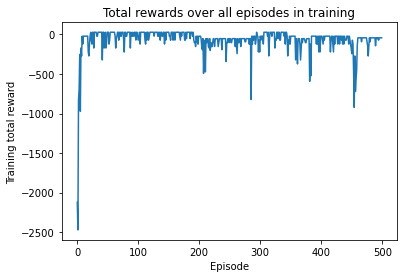

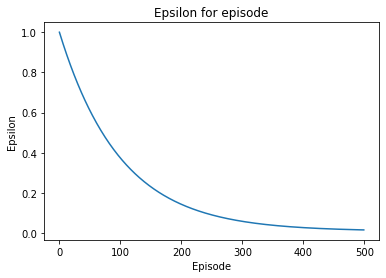

In [49]:
learn(use_sarsa=False)

#### SARSA

Failed episode: 0
Total reward for episode 0: -2373.0
Failed episode: 1
Total reward for episode 1: -1370.5
Failed episode: 2
Total reward for episode 2: -770
Failed episode: 3
Total reward for episode 3: -271.5
Failed episode: 4
Total reward for episode 4: -371.0
Failed episode: 5
Total reward for episode 5: -42.0
Failed episode: 6
Total reward for episode 6: -92.0
Failed episode: 7
Total reward for episode 7: -292.0
Failed episode: 8
Total reward for episode 8: -842.5
Failed episode: 9
Total reward for episode 9: -452.5
Failed episode: 10
Total reward for episode 10: -291.0
Failed episode: 11
Total reward for episode 11: -772.5
Failed episode: 12
Total reward for episode 12: -1021.0
Failed episode: 13
Total reward for episode 13: -521.5
Failed episode: 14
Total reward for episode 14: -171.0
Failed episode: 15
Total reward for episode 15: -142.0
Failed episode: 16
Total reward for episode 16: -42.0
Failed episode: 17
Total reward for episode 17: -42.0
Failed episode: 18
Total reward f

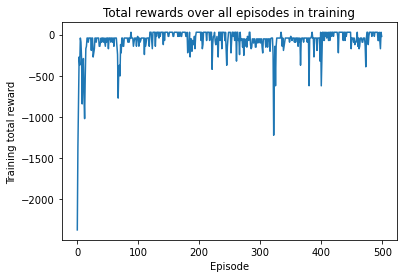

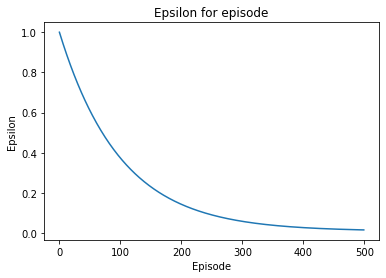

In [50]:
learn(use_sarsa=True)

#### Complex Model

In [41]:
env = TakeTheLEnv()
env.set_board( [[1, 3, 3, 0],
                [1, 0, 3, 2],
                [1, 1, 3, 2],
                [0, 0, 2, 2]])
env.render()


    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾



## Algorithms execution for the complex board

Failed episode: 1
Total reward for episode 1: -360.75
Failed episode: 2
Total reward for episode 2: -330.75
Failed episode: 3
Total reward for episode 3: -160.75
Failed episode: 4
Total reward for episode 4: -230.75
Failed episode: 5
Total reward for episode 5: -861.5
Failed episode: 6
Total reward for episode 6: -510.75
Failed episode: 7
Total reward for episode 7: -360.75
Failed episode: 8
Total reward for episode 8: -310.75
Failed episode: 9
Total reward for episode 9: -460.75
Failed episode: 10
Total reward for episode 10: -310.75
Failed episode: 11
Total reward for episode 11: -580.75
Failed episode: 12
Total reward for episode 12: -10.75
Failed episode: 13
Total reward for episode 13: -110.75
Failed episode: 14
Total reward for episode 14: -60.75
Failed episode: 15
Total reward for episode 15: -110.75
Failed episode: 16
Total reward for episode 16: -110.75
Failed episode: 17
Total reward for episode 17: -10.75
Failed episode: 18
Total reward for episode 18: -60.75
Failed episode:

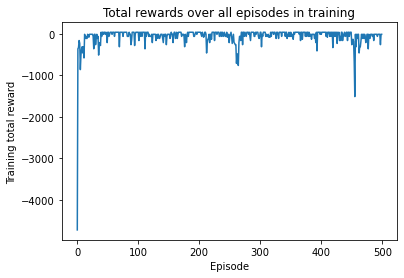

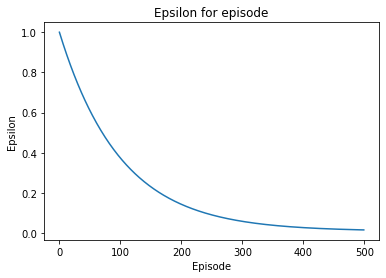

In [42]:
learn(use_sarsa=False)

Failed episode: 1
Total reward for episode 1: -490.75
Failed episode: 2
Total reward for episode 2: -430.75
Failed episode: 3
Total reward for episode 3: -1361.5
Failed episode: 4
Total reward for episode 4: -430.75
Failed episode: 5
Total reward for episode 5: -330
Failed episode: 6
Total reward for episode 6: -660.75
Failed episode: 7
Total reward for episode 7: -960.75
Failed episode: 8
Total reward for episode 8: -181.5
Failed episode: 9
Total reward for episode 9: -2431.5
Failed episode: 10
Total reward for episode 10: -110
Failed episode: 11
Total reward for episode 11: -210.75
Failed episode: 12
Total reward for episode 12: -260
Failed episode: 13
Total reward for episode 13: -210.75
Failed episode: 14
Total reward for episode 14: -60.75
Failed episode: 15
Total reward for episode 15: -10.75
Failed episode: 16
Total reward for episode 16: -110.75
Failed episode: 17
Total reward for episode 17: -110.75
Failed episode: 18
Total reward for episode 18: -60.75
Failed episode: 19
Tota

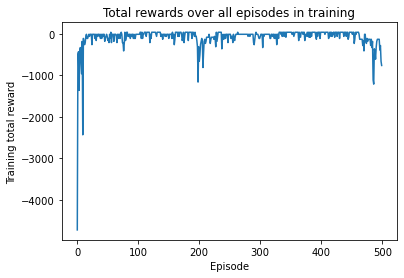

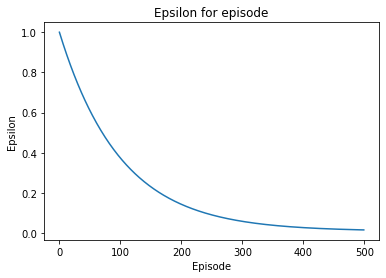

In [43]:
learn(use_sarsa=True)